In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

C:\Users\rizve\AppData\Local\Temp/ipykernel_5792/2978911075.py:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  current_cmap.set_bad(color = 'red')


Backtrack masked with np.nan: [[nan nan nan nan nan  8. 10. 16. 12.  9.]
 [13. 18. 18. 19. nan nan  6. 10. 10. 10.]
 [ 3.  7.  3.  9. 14. nan nan  7.  4.  5.]
 [ 3.  1. 10. 17.  1. 11. nan 11.  1.  6.]
 [ 2.  3.  8.  5. 10. 10. nan 10.  9.  8.]
 [19. 10.  5. 12.  9.  1. nan nan nan  9.]
 [16.  8. 18. 10. 10. 11. 14. 17. nan 19.]
 [18. 19.  2.  5. 10. 10. 17. 17. nan nan]
 [18.  1.  8.  2.  8. 19. 18.  5.  2. nan]
 [10. 19. 18.  9. 15.  6.  3. 11. 12. nan]]
Path: [[9, 9], [8, 9], [7, 9], [7, 8], [6, 8], [5, 8], [5, 7], [5, 6], [4, 6], [3, 6], [2, 6], [2, 5], [1, 5], [1, 4], [0, 4], [0, 3], [0, 2], [0, 1], [0, 0]] 
Shortest minutes possible with Dijkstra: 107 minutes


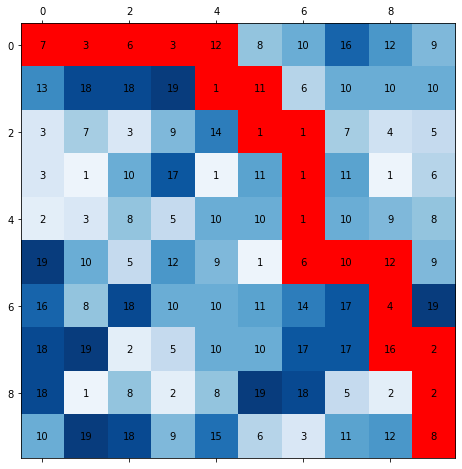

In [7]:

num_cols = 10
num_rows = 10

grid = np.random.randint(1, 20, size=(num_cols, num_rows))

def improved_search(grid):

    #Initialize arrays to accumulate distances
    acm_dist = np.ones((num_cols,num_rows), dtype=int) * np.inf
    acm_dist[0,0] = grid[0,0]
    
    # To store our backtracks
    bktrack_dist = np.ones((num_cols, num_rows), dtype=int) * np.nan

    # keeps trach of the cells that have been visited    
    visited = np.zeros((num_cols, num_rows), dtype=bool)
    
    # to end the process
    end = False
    
    # initiation of index
    x = np.int32(0)
    y = np.int32(0)
    count=0
    
    # Using Dijkstra's logic for all the rows and columns
    while not end:
      # move to x+1,y
      if x < num_cols - 1:
        if acm_dist[x+1,y] > grid[x+1, y]+acm_dist[x, y] and not visited[x+1, y]:
          acm_dist[x+1,y] = grid[x+1 ,y]+acm_dist[x, y]
          bktrack_dist[x+1,y] = np.ravel_multi_index([x, y], (num_cols, num_rows))
      # move to x-1,y
      if x > 0:
        if acm_dist[x-1 ,y] > grid[x-1 ,y] + acm_dist[x, y] and not visited[x-1 ,y]:
          acm_dist[x-1 ,y] = grid[x-1 ,y] + acm_dist[x ,y]
          bktrack_dist[x-1 ,y] = np.ravel_multi_index([x ,y], (num_cols ,num_rows))
      # move to x,y+1
      if y < num_rows-1:
        if acm_dist[x ,y+1] > grid[x ,y+1] + acm_dist[x ,y] and not visited[x ,y+1]:
          acm_dist[x, y+1] = grid[x, y+1] + acm_dist[x ,y]
          bktrack_dist[x, y+1] = np.ravel_multi_index([x ,y], (num_cols ,num_rows))
      # move to x,y-1
      if y > 0:
        if acm_dist[x ,y-1] > grid[x ,y-1] + acm_dist[x ,y] and not visited[x ,y-1]:
          acm_dist[x ,y-1] = grid[x ,y-1] + acm_dist[x ,y]
          bktrack_dist[x, y-1] = np.ravel_multi_index([x, y], (num_cols, num_rows))
    
      visited[x ,y] = True
      acm_dist_temp = acm_dist
      acm_dist_temp[np.where(visited)] = np.inf
      
      # now we find the shortest path so far
      min_path = np.unravel_index(np.argmin(acm_dist_temp), np.shape(acm_dist_temp))
      x = min_path[0]
      y = min_path[1]
      if x == num_cols-1 and y == num_rows-1:
        end = True
      count += 1
    
    #Start backtracking to plot the path  
    retreat = grid.astype(float)
    x = num_cols-1
    y = num_rows-1
    path=[]
    retreat[np.int32(x),np.int32(y)] = np.nan
    
    while x > 0.0 or y > 0.0:
      path.append([np.int32(x) ,np.int32(y)])
      temp = np.unravel_index(np.int32(bktrack_dist[np.int32(x) ,np.int32(y)]), (num_cols ,num_rows))
      x = temp[0]
      y = temp[1]
      retreat[np.int32(x), np.int32(y)] = np.nan
    path.append([np.int32(x), np.int32(y)])
    
    #Output and visualization of the path
    current_cmap = plt.cm.Blues
    # Masking the shortest path with nan
    current_cmap.set_bad(color = 'red')
    fig, ax = plt.subplots(figsize=(8,8))
    ax.matshow(retreat, cmap=plt.cm.Blues, vmin=0, vmax=20)
    for i in range(num_rows):
        for j in range(num_cols):
          c = grid[j, i]
          ax.text(i, j, str(c), va='center', ha='center')
    
    print('Backtrack masked with np.nan: {}'.format(retreat))
    print('Path: {} '.format(path))
    print('Shortest minutes possible with Dijkstra: {:.0f} minutes'.format(acm_dist[num_cols-1, num_rows-1]))

improved_search(grid)